In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import math

In [129]:
from sklearn.metrics import accuracy_score

In [36]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

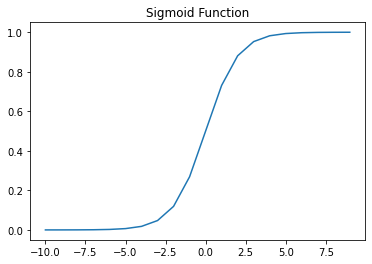

In [37]:
plt.plot(range(-10,10), [sigmoid(i) for i in range(-10,10)])
plt.title('Sigmoid Function')
plt.show()

In [217]:
def make_prediction(B, X):
    z = 0
    for i in range(len(B)):
        z += B[i]*X[i]
    return sigmoid(z)

def update_coefficients(B, X, y, alpha=0.1):
    prediction = make_prediction(B, X)
    B_new = []
    for i in range(len(B)):
        B_new.append(B[i]+alpha*(y-prediction)*prediction*(1-prediction)*X[i])
    return B_new
    
def train_and_predict(df, epochs):
    df_copy = df.copy()
    B = [0 for b in range(df_copy.shape[1])]
    feature_list = ['feature'+str(i) for i in range(1,df_copy.shape[1])]

    for i in range(epochs):
        X = [1]
        [X.append(df_copy[feature_list[j]][i]) for j in range(len(feature_list))]
        B = update_coefficients(B, X, df_copy.target[i])
    
    predictions = []
    for i in range(df_copy.shape[0]):
        X = [1]
        [X.append(df_copy[feature_list[j]][i]) for j in range(len(feature_list))]
        predictions.append(make_prediction(B, X))
    df_copy['predictions_probs'] = predictions
    df_copy['predictions_class'] = df_copy.predictions_probs.apply(lambda x: 1 if x >= 0.5 else 0)

    return B, df_copy

def evaluate(df, epochs):
    epoch_list = range(1, epochs)
    accuracy = []
    for epoch in epoch_list:
        B, df_predicts = train_and_predict(df, epoch)
        accuracy.append(accuracy_score(df_predicts.target, df_predicts.predictions_class))

    plt.plot(epoch_list, accuracy)
    plt.xticks(epoch_list)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy Score')
    plt.show()

    return B, max(accuracy)

In [197]:
from sklearn.datasets import make_classification
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)
df = pd.DataFrame(x, columns=['feature1', 'feature2'])
df['target'] = y

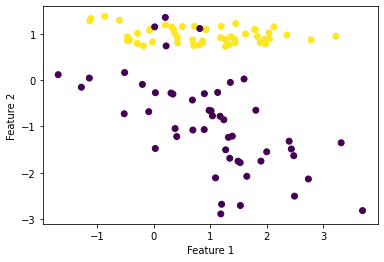

In [133]:
plt.scatter(df.feature1, df.feature2, c=df.target)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

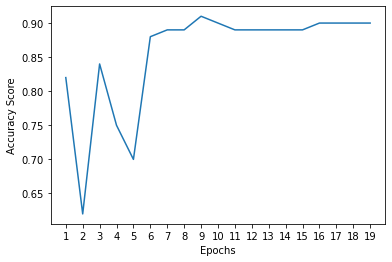

([0.03244643952026196, 0.009210243974029059, 0.22804629699935178], 0.91)

In [218]:
evaluate(df, 20)

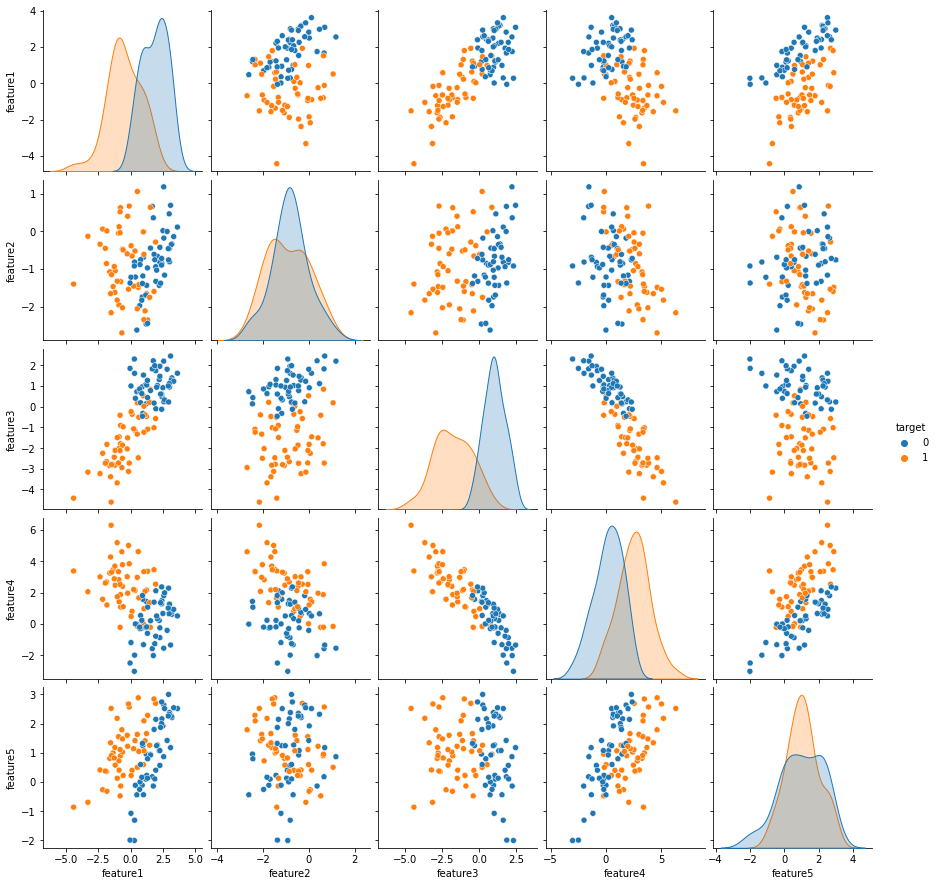

In [201]:
x, y = make_classification(n_features=5, n_redundant=2, n_informative=3, random_state=0, n_clusters_per_class=1)
df2 = pd.DataFrame(x, columns=['feature'+str(i+1) for i in range(len(x[0]))])
df2['target'] = y
sns.pairplot(df2, hue='target')
plt.show()

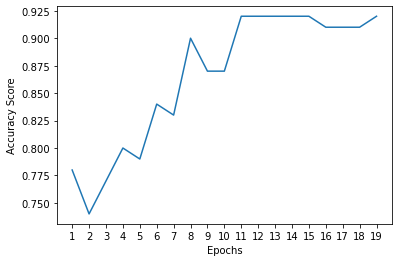

([0.05003849807203436,
  -0.21940258868674273,
  -0.020868883102660437,
  -0.24570223204754368,
  0.19538790437231127,
  -0.011632599720492243],
 0.92)

In [219]:
evaluate(df2, 20)